## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import aplpy
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

FA_radeg = 50.673825
FA_decdeg = -37.208227

BeamRa = 51.299614
BeamDec = -37.707858

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'contFigs/'

outSynPlot = figDir+'lobesSynF8.png'
synMap = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency.FITS_maskCut.fits'


print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



	-----> Loaded <-----


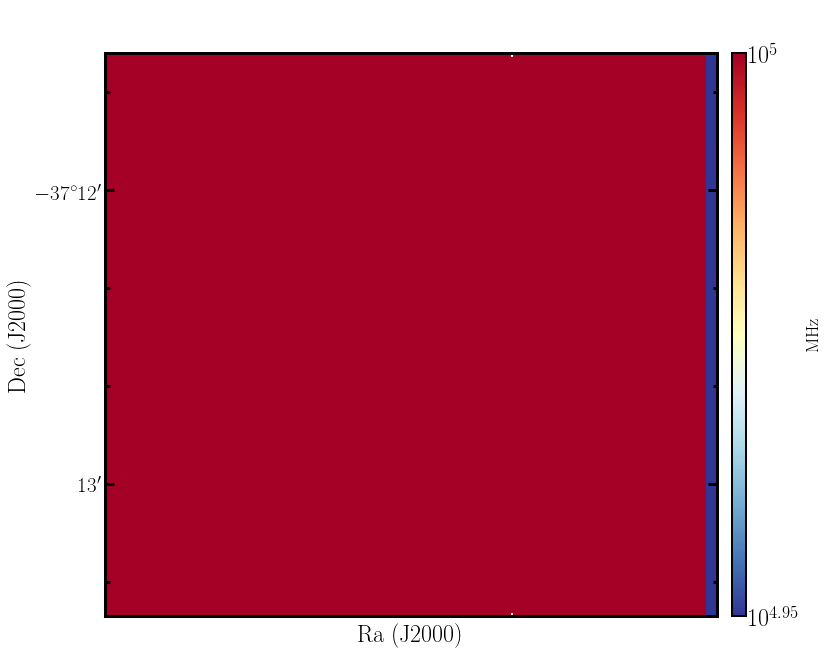

In [21]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#


params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 24,
          'ytick.labelsize'     : 24, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=synMap

fig = plt.figure(figsize=(12, 12))

f4 = aplpy.FITSFigure(a, figure=fig, subplot=(1,1,1))
f4.show_colorscale(aspect='equal', cmap='RdYlBu_r',stretch = 'log',
                    exponent=1,vmin=9e4,vmax=1.e5)
f4.frame.set_linewidth(3)
f4.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)

#f4.set_title('Break frequency map')

f4.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 
f4.axis_labels.set_font( weight='medium', \
                        stretch='semi-expanded', family='serif', \
                         style='normal', variant='normal',size=24)

f4.tick_labels.set_xformat('hh:mm')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('Ra (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')

f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()


f4.add_colorbar(log_format=True)
#f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
f4.colorbar.set_ticks([90000,1e5])
f4.colorbar.set_frame_linewidth(1)
f4.colorbar.set_pad(0.2)
f4.colorbar.set_font( weight='medium', \
                      stretch='semi-expanded', family='serif', \
                      style='normal', variant='normal',size=24)

f4.colorbar.set_axis_label_text(r'MHz')

f4.show_ellipses(BeamRa, BeamDec, 580./3600., 580./3600., angle=0, edgecolor='black',linewidth=2)

fig.tight_layout()

fig.savefig(outSynPlot,format='png',overwrite=True)


print '\n\t-----> Loaded <-----'

In [70]:
def plot_nubreakInt(Elobe,Wlobe,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Flux density [Jy]')
    ax1.set_ylabel(r'Frequency [GHz]')
    ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    
    xmin = np.nanmin([np.nanmin(ELobe[0,:]),np.nanmin(WLobe[0,:])])
    xmax = np.nanmax([np.nanmax(ELobe[0,:]),np.nanmax(WLobe[0,:])])

    ymin = np.nanmin([np.nanmin(ELobe[1,:]),np.nanmin(WLobe[1,:])])
    
    ymax = np.nanmax([np.nanmax(ELobe[1,:]),np.nanmax(WLobe[1,:])])
    
    #ax1.set_ylim([ymin*0.9,ymax*1.1])
    #ax1.set_xlim([xmin*0.9,xmax*1.1])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    ELobePlot = ax1.scatter(ELobe[0,:],ELobe[1,:],
             marker='o', color='red',label='East Lobe',s=10) 
    #ELobePlot[-1][0].set_linestyle('--')
    #ELobePlot[-1][0].set_linewidth(3)
    
    WLobePlot = ax1.scatter(WLobe[0,:],WLobe[1,:],
             marker='o', color='blue',label='West Lobe',s=10) 
    #WLobePlot[-1][0].set_linestyle('--')
    #WLobePlot[-1][0].set_linewidth(3)
    
    #CorePlot = ax1.errorbar(Core['Frequency [MHz]'],Core['Integrated Flux [Jy]'], yerr=Core['Error [Jy]'],
     #$        marker='o', color='green', linestyle=' ',label='Core',capsize=6) 
    #CorePlot[-1][0].set_linestyle('--')
    #CorePlot[-1][0].set_linewidth(3)



    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)

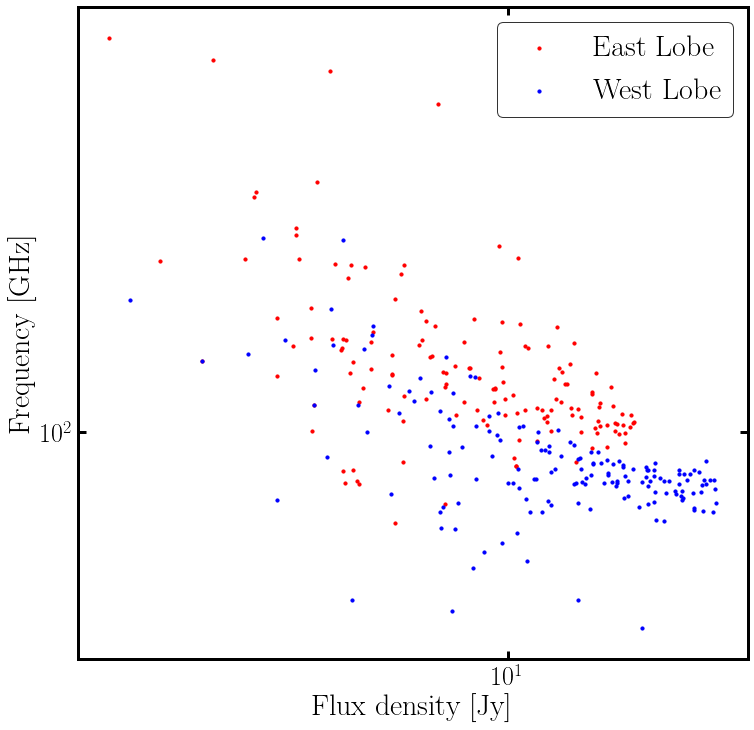

In [72]:
import pyregion
synMap = rootDir+'JP_synage::JP_Shape.break_frequency.FITS_maskCut.fits'
meerMap =  rootDir+'/inIms/CONVL/FINAL_Meer_1440MHz_pbcorr_pbcorr_maskCut.fits'

region = [rootDir+'inIms/regions/EL.reg', rootDir+'inIms/regions/WL.reg']
for i in xrange(0,len(region)):
    
    meerfile =  fits.open(meerMap)
    
    heads= meerfile[0].header
    datas =meerfile[0].data
    synfile =fits.open(synMap)
    hh = synfile[0].header
    dd = synfile[0].data
    
    r = pyregion.open(region[i]).as_imagecoord(heads)
    shape = (heads['NAXIS2'], heads['NAXIS1'])
    m = r.get_mask(shape=shape)
    
    ints = datas[m==True]
    
    breaks = dd[m==True]
    
    if i == 0:
        ELobe = np.array([ints,breaks/1e3])
    elif i ==1:
        WLobe = np.array([ints,breaks/1e3])
        
                
outBreakPlot = figDir+'lobesIntBreakcv217.png'

plot_nubreakInt(ELobe,WLobe,outBreakPlot)
    